# Business Understanding
#
PT. Indomarco Prismatama adalah perusahaan di bidang retail. PT. Indomarco Prismatama Cabang mensupply logistik ke setiap Toko Indomaret yang ada. Dalam hal ini analisis di lakukan pada bagian NPB (Nota Pemberian Barang). Pada bagian NPB, sering kali "kecolongan" perihal barang, sehingga saat ada permintaan, barang tersebut tidak dapat di penuhi, sehingga pemenuhan toko terhambat.

# Business Problem
#
Hal ini terpengaruh oleh banyak faktor seperti Permintaan Jumlah Barang, Produktifitas Tim Storage, PO barang yang terlambat, dan sebagainya.

# Analityc Goals
#
Melalukan cluster atau pengelompokan barang yang sering kali kosong, sehingga di lakukan perbaikan penangan terhadap barang tersebut.

# Data Understanding
#
Dalam analisis kali ini di peroleh data melalui Logistic Information System. Di dalam data ini terdapat PB (Permintaan Barang) vs PIC (Pemberian Barang)

Bisa di lihat sebagai berikut :

## Deskripsi Library Yang Di Gunakan

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Memanggil Dataset

In [28]:
df = pd.read_csv('dataset.csv')

In [29]:
df.head()

,TOKO,NAMA,PB,PIC,REAL,BACKUP,URUT,JARAK (KM),NOPIC,TGLPICK,NOPB,NOSJ,CNT,BRJ,DOL,KLIK,ZN
0,FQSG,DE KERATON,5.631,1.669,3.602,NaN,2,27.5,11521124,6/8/2023,900857,61183,22,3,0,NaN,D
1,TQDC,TELAGASARI KOSAMBI,6.058,1.812,4.080,NaN,1,28.9,11521123,6/8/2023,901031,61183,28,3,0,NaN,D
2,T7SA,SUPRAPTO,4.489,0.947,2.682,NaN,1,60.8,11521138,6/8/2023,900864,61187,18,2,0,NaN,Q
3,TVJV,GRIYA SETU PERMAI,5.301,1.188,2.938,NaN,2,62.1,11521141,6/8/2023,901005,61187,21,2,0,NaN,Q
4,FXWH,MUSTIKA PARK PLACE,5.923,1.434,3.269,NaN,3,63.6,11521143,6/8/2023,900689,61187,25,2,0,NaN,Q


# Persiapan Data

In [30]:
X = df.drop(['TOKO', 'NAMA', 'BACKUP', 'URUT', 'JARAK (KM)', 'NOPIC', 'TGLPICK', 'DOL', 'KLIK', 'ZN', 'NOSJ', 'NOPB', 'CNT', 'BRJ'], axis=1)

In [31]:
print(X)

        PB    PIC   REAL
0    5.631  1.669  3.602
1    6.058  1.812  4.080
2    4.489  0.947  2.682
3    5.301  1.188  2.938
4    5.923  1.434  3.269
..     ...    ...    ...
470  4.603  1.064  2.830
471  3.709  0.649  2.500
472  4.802  0.981  2.682
473  4.235  0.710  2.426
474  4.287  0.903  2.608

[475 rows x 3 columns]


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PB      475 non-null    float64
 1   PIC     475 non-null    float64
 2   REAL    475 non-null    float64
dtypes: float64(3)
memory usage: 11.3 KB


# Elbow Cluster

c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

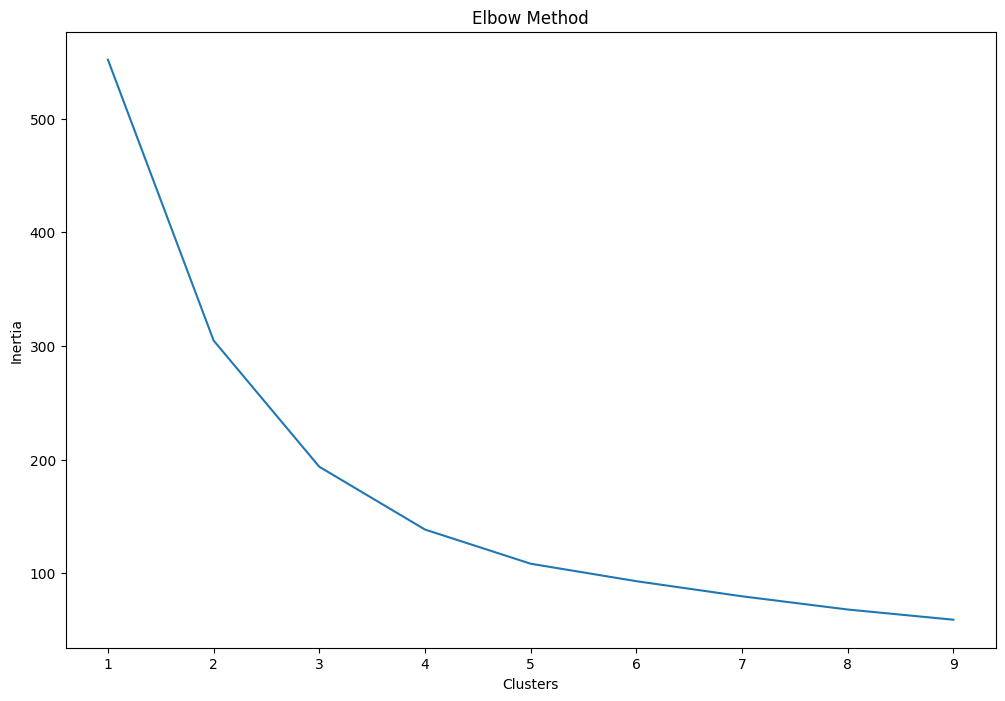

In [33]:
clusters = []
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=np.arange(1, 10), y=clusters, ax=ax)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.show()

# Visualisasi dan Hasil Analisa Cluster

In [34]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['LABELS'] = kmean.labels_

c:\Users\Panggil Aja Rei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


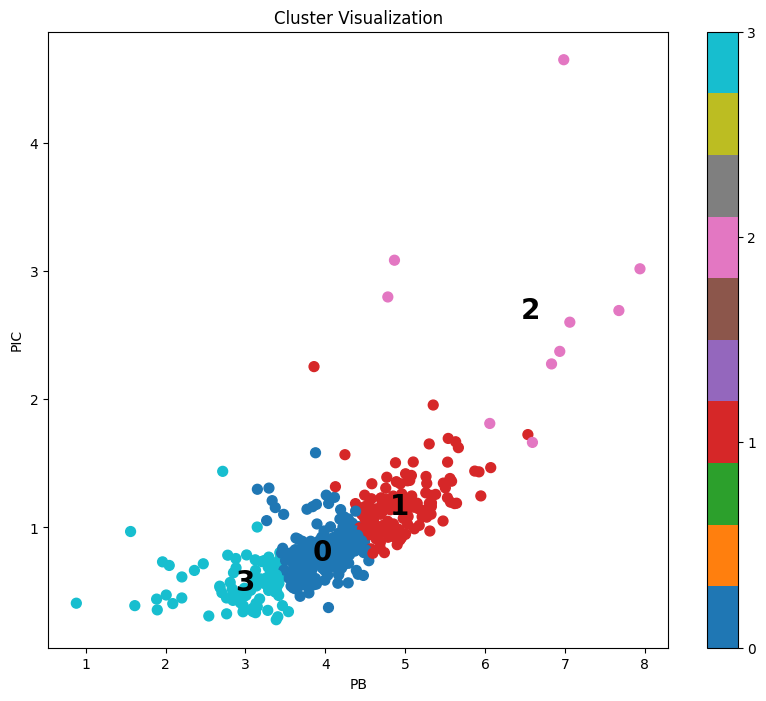

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(X['PB'], X['PIC'], c=X['LABELS'], marker='o', s=50, cmap='tab10')

for label in X['LABELS'].unique():
    plt.annotate(label,
                (X[X['LABELS'] == label]['PB'].mean(),
                X[X['LABELS'] == label]['PIC'].mean()),
                horizontalalignment='center',
                verticalalignment='center',
                size=20, weight='bold',
                color='black')

plt.xlabel('PB')
plt.ylabel('PIC')
plt.title('Cluster Visualization')
plt.colorbar(ticks=range(n_clust))
plt.show()


In [36]:
print(X)

        PB    PIC   REAL  LABELS
0    5.631  1.669  3.602       1
1    6.058  1.812  4.080       2
2    4.489  0.947  2.682       1
3    5.301  1.188  2.938       1
4    5.923  1.434  3.269       1
..     ...    ...    ...     ...
470  4.603  1.064  2.830       1
471  3.709  0.649  2.500       0
472  4.802  0.981  2.682       1
473  4.235  0.710  2.426       0
474  4.287  0.903  2.608       0

[475 rows x 4 columns]


In [37]:
X.to_excel("Hasil Cluster.xlsx")

In [38]:
import pickle

In [39]:
pickle.dump(ar, open('cluster.sav', 'wb'))

NameError: name 'ar' is not defined